# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [56]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.1056787
Average number of iterations is 61.9.


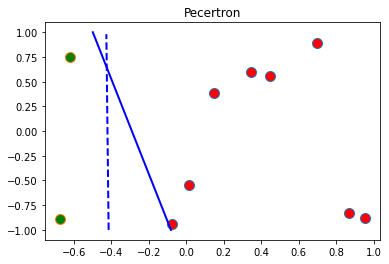

In [57]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 10 # number of training data
avgIter = 0
E_train = 0
E_test = 0
nTest = 10000
for i in range(nRep):
    X_total, y_total, w_f = mkdata(nTrain + nTest)
    # X_test, y_test, w_f_test = mkdata(nTest)
    X = X_total[:, :nTrain]
    X_test = X_total[:, nTrain:]
    y = y_total[:, :nTrain]
    y_test = y_total[:, nTrain:]
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T
    # print("y:{}, y_predict:{}".format(y, y_train_predict))  
    # I transpose the predictions because they're column vectors here 
    # whereas y and y_test are row vectors 
    E_train += (y != y_train_predict.T).sum()
    E_test += (y_test != y_test_predict.T).sum()
    # Sum up number of iterations
    avgIter += iters
avgIter /= nRep 
E_train /= nRep * nTrain
E_test /= nRep * nTest

# rate of training error shall be 0
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

E_train is 0.00215, E_test is 0.0154882
Average number of iterations is 1823.8.


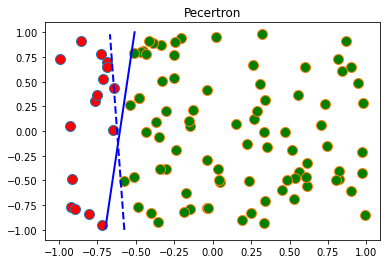

In [58]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
avgIter = 0
E_train = 0
E_test = 0
nTest = 10000
for i in range(nRep):
    X_total, y_total, w_f = mkdata(nTrain + nTest)
    # X_test, y_test, w_f_test = mkdata(nTest)
    X = X_total[:, :nTrain]
    X_test = X_total[:, nTrain:]
    y = y_total[:, :nTrain]
    y_test = y_total[:, nTrain:]
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T

    # I transpose the predictions because they're column vectors here 
    # whereas y and y_test are row vectors 
    E_train += (y != y_train_predict.T).sum()
    E_test += (y_test != y_test_predict.T).sum()
    # Sum up number of iterations
    avgIter += iters
avgIter /= nRep 
E_train /= nRep * nTrain
E_test /= nRep * nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.23873, E_test is 0.2470959
Average number of iterations is 6000.0.


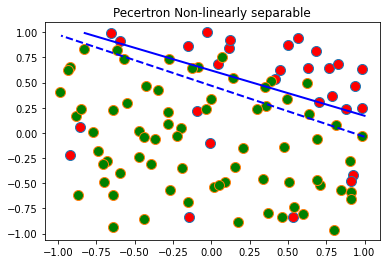

In [59]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
avgIter = 0
E_train = 0
E_test = 0
nTest = 10000
for i in range(nRep):
    X_total, y_total, w_f = mkdata(nTrain + nTest, 'noisy')
    # X_test, y_test, w_f_test = mkdata(nTest)
    X = X_total[:, :nTrain]
    X_test = X_total[:, nTrain:]
    y = y_total[:, :nTrain]
    y_test = y_total[:, nTrain:]
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T

    E_train += (y != y_train_predict.T).sum()
    E_test += (y_test != y_test_predict.T).sum()
    # Sum up number of iterations
    avgIter += iters
avgIter /= nRep 
E_train /= nRep * nTrain
E_test /= nRep * nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')

### Part3: Linear Regression

E_train is 0.03884, E_test is 0.0485747


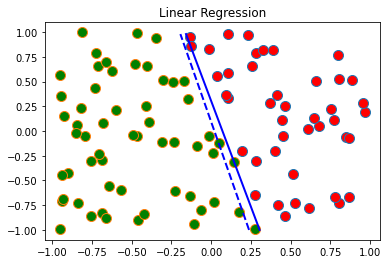

In [60]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data

E_train = 0
E_test = 0
nTest = 10000

for i in range(nRep):
    X_total, y_total, w_f = mkdata(nTrain + nTest)
    # X_test, y_test, w_f_test = mkdata(nTest)
    X = X_total[:, :nTrain]
    X_test = X_total[:, nTrain:]
    y = y_total[:, :nTrain]
    y_test = y_total[:, nTrain:]

    w_g = linear_regression(X, y)

    # Compute training, testing error
    y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T

    E_train += (y != y_train_predict.T).sum()
    E_test += (y_test != y_test_predict.T).sum()

E_train /= nRep * nTrain
E_test /= nRep * nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.13293, E_test is 0.1426585


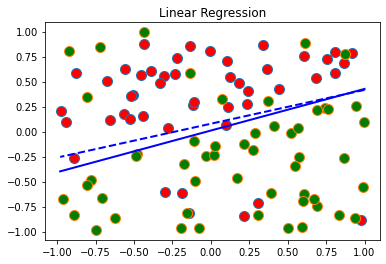

In [61]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data

E_train = 0
E_test = 0
nTest = 10000

for i in range(nRep):
    X_total, y_total, w_f = mkdata(nTrain + nTest, 'noisy')
    # X_test, y_test, w_f_test = mkdata(nTest)
    X = X_total[:, :nTrain]
    X_test = X_total[:, nTrain:]
    y = y_total[:, :nTrain]
    y_test = y_total[:, nTrain:]

    w_g = linear_regression(X, y)
    
    # Compute training, testing error
    y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T

    E_train += (y != y_train_predict.T).sum()
    E_test += (y_test != y_test_predict.T).sum()

E_train /= nRep * nTrain
E_test /= nRep * nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part5: Linear Regression: poly_fit

In [62]:
import scipy.io as sio
E_train = 0
E_test = 0

poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
y_train_predict = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
y_test_predict = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T

E_train += (y != y_train_predict.T).sum()
E_test += (y_test != y_test_predict.T).sum()

nTrain = X.shape[1]
nTest = X_test.shape[1]

E_train /= nTrain
E_test /= nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
def transformation(x):
    # x1x2
    newRow_1 = x[0, :] * x[1, :]
    # x1^2
    newRow_2 = x[0, :] * x[0, :]
    # x2^2
    newRow_3 = x[1, :] * x[1, :]

    x_new = np.vstack((x, newRow_1, newRow_2, newRow_3))
    return x_new

X_t = transformation(X)
X_test_t = transformation(X_test)
w = linear_regression(X_t, y)

# Compute training, testing error
y_train_predict = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_t.shape[1])), X_t)))).T
y_test_predict = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t)))).T

E_train = 0
E_test = 0

E_train += (y != y_train_predict.T).sum()
E_test += (y_test != y_test_predict.T).sum()

nTrain = X.shape[1]
nTest = X_test.shape[1]

E_train /= nTrain
E_test /= nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.00772, E_test is 0.0163204


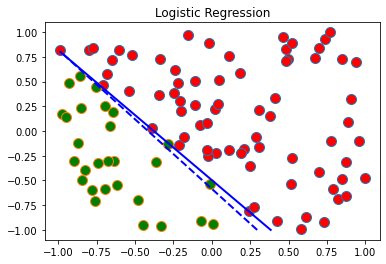

In [63]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 1000 # number of replicates
nTrain = 100 # number of training data

nTest = 10000
E_test = 0
E_train = 0

for i in range(nRep):
    X_total, y_total, w_f = mkdata(nTrain + nTest)
    # X_test, y_test, w_f_test = mkdata(nTest)
    X = X_total[:, :nTrain]
    X_test = X_total[:, nTrain:]
    y = y_total[:, :nTrain]
    y_test = y_total[:, nTrain:]

    w_g = logistic(X, y)
    # Compute training, testing error
        # Compute training, testing error
    y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T

    E_train += (y != y_train_predict.T).sum()
    E_test += (y_test != y_test_predict.T).sum()

E_train /= nRep * nTrain
E_test /= nRep * nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.12386, E_test is 0.1354778


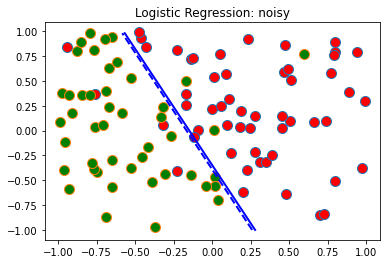

In [64]:

from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 1000 # number of replicates
nTrain = 100 # number of training data

nTest = 10000
E_test = 0
E_train = 0

for i in range(nRep):
    X_total, y_total, w_f = mkdata(nTrain + nTest, 'noisy')
    # X_test, y_test, w_f_test = mkdata(nTest)
    X = X_total[:, :nTrain]
    X_test = X_total[:, nTrain:]
    y = y_total[:, :nTrain]
    y_test = y_total[:, nTrain:]

    w_g = logistic(X, y)
    # Compute training, testing error
        # Compute training, testing error
    y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T

    E_train += (y != y_train_predict.T).sum()
    E_test += (y_test != y_test_predict.T).sum()

E_train /= nRep * nTrain
E_test /= nRep * nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.0348059
Average number of support vectors is 3.544.


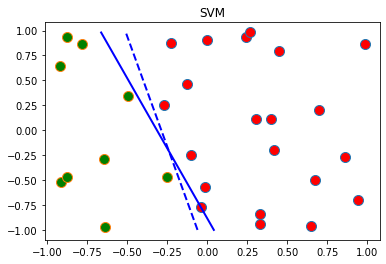

In [65]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 30; # number of training data

nTest = 10000
E_test = 0
E_train = 0
avgNum = 0

for i in range(nRep):
    X_total, y_total, w_f = mkdata(nTrain + nTest)
    # X_test, y_test, w_f_test = mkdata(nTest)
    X = X_total[:, :nTrain]
    X_test = X_total[:, nTrain:]
    y = y_total[:, :nTrain]
    y_test = y_total[:, nTrain:]

    w_g, num_sc = svm(X, y)
    # Compute training, testing error
    y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T

    E_train += (y != y_train_predict.T).sum()
    E_test += (y_test != y_test_predict.T).sum()
    # Sum up number of support vectors
    avgNum += num_sc

avgNum /= nRep
E_train /= nRep * nTrain
E_test /= nRep * nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

E_train is 0.0, E_test is 0.0107987
Average number of support vectors is 3.094.


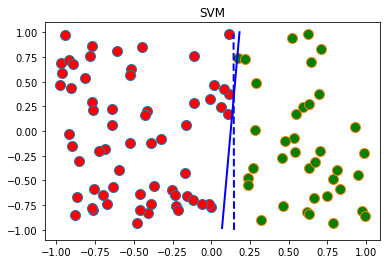

In [66]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

nTest = 10000
E_test = 0
E_train = 0
avgNum = 0

for i in range(nRep):
    X_total, y_total, w_f = mkdata(nTrain + nTest)
    # X_test, y_test, w_f_test = mkdata(nTest)
    X = X_total[:, :nTrain]
    X_test = X_total[:, nTrain:]
    y = y_total[:, :nTrain]
    y_test = y_total[:, nTrain:]

    w_g, num_sc = svm(X, y)
    # Compute training, testing error
    y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T

    E_train += (y != y_train_predict.T).sum()
    E_test += (y_test != y_test_predict.T).sum()
    # Sum up number of support vectors
    avgNum += num_sc

avgNum /= nRep
E_train /= nRep * nTrain
E_test /= nRep * nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.